In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [ ]:
accidents = pd.read_csv('Accidents0514.csv')
vehicles = pd.read_csv('Vehicles0514.csv')
casualties = pd.read_csv('Casualties0514.csv')

In [11]:
print(accidents.head())
print(vehicles.head())
print(casualties.head())


  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties        Date  ...  Pedestrian_Crossing-Human_Control  \
0                     1  04/01/2005  

In [12]:
print(accidents.isnull().sum())

accidents = accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)  # Example of dropping columns

accidents['Date'] = pd.to_datetime(accidents['Date'], format='%d/%m/%Y')

print(accidents.info())


Accident_Index                                      0
Location_Easting_OSGR                             111
Location_Northing_OSGR                            111
Longitude                                         111
Latitude                                          111
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              133
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

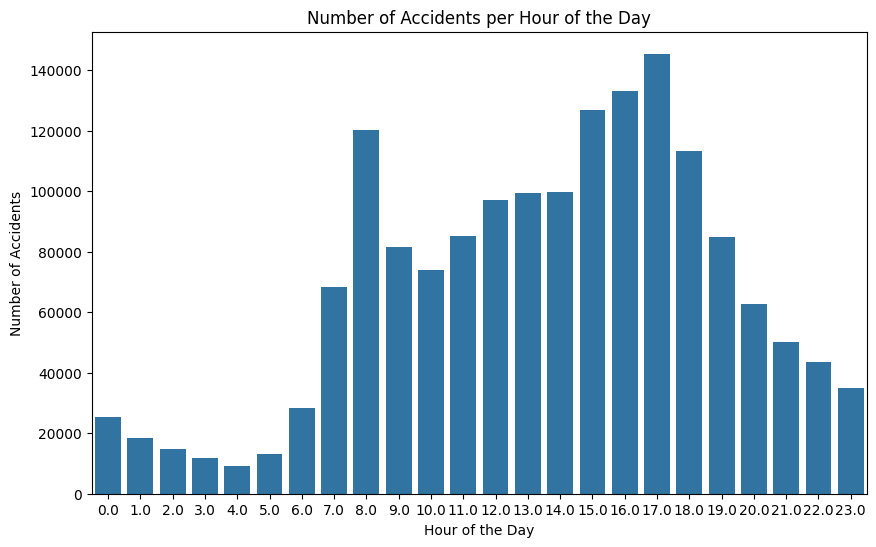

In [13]:
accidents['Hour'] = accidents['Time'].str.split(':').str[0].astype(float)
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=accidents)
plt.title('Number of Accidents per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()


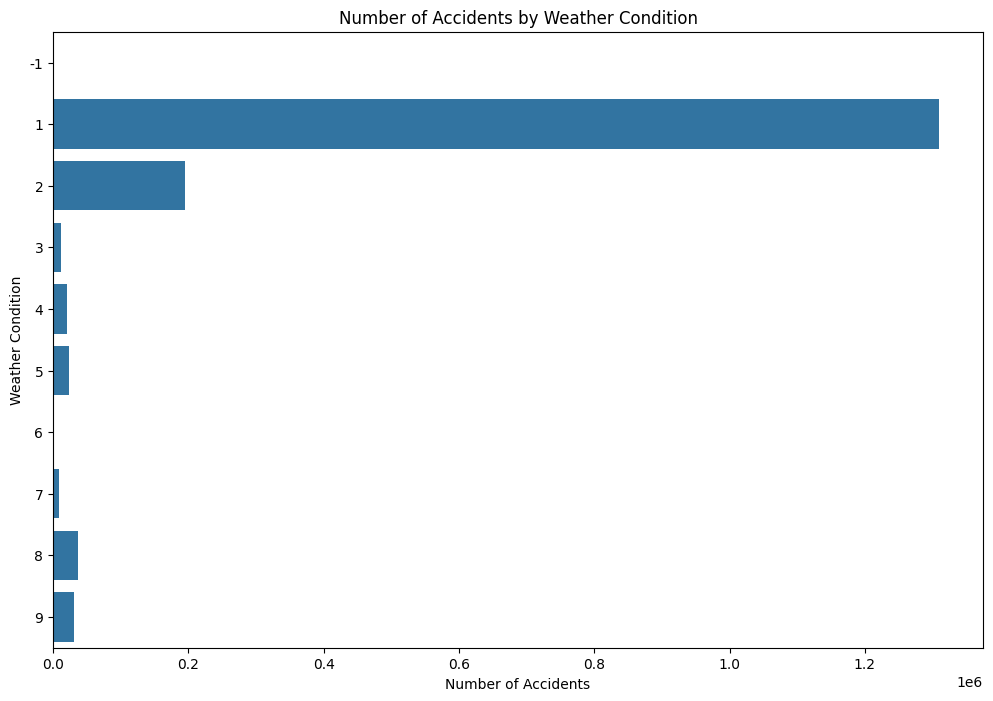

In [14]:
plt.figure(figsize=(12,8))
weather_conditions = accidents['Weather_Conditions'].value_counts().head(10).index
sns.countplot(y='Weather_Conditions', data=accidents[accidents['Weather_Conditions'].isin(weather_conditions)])
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()


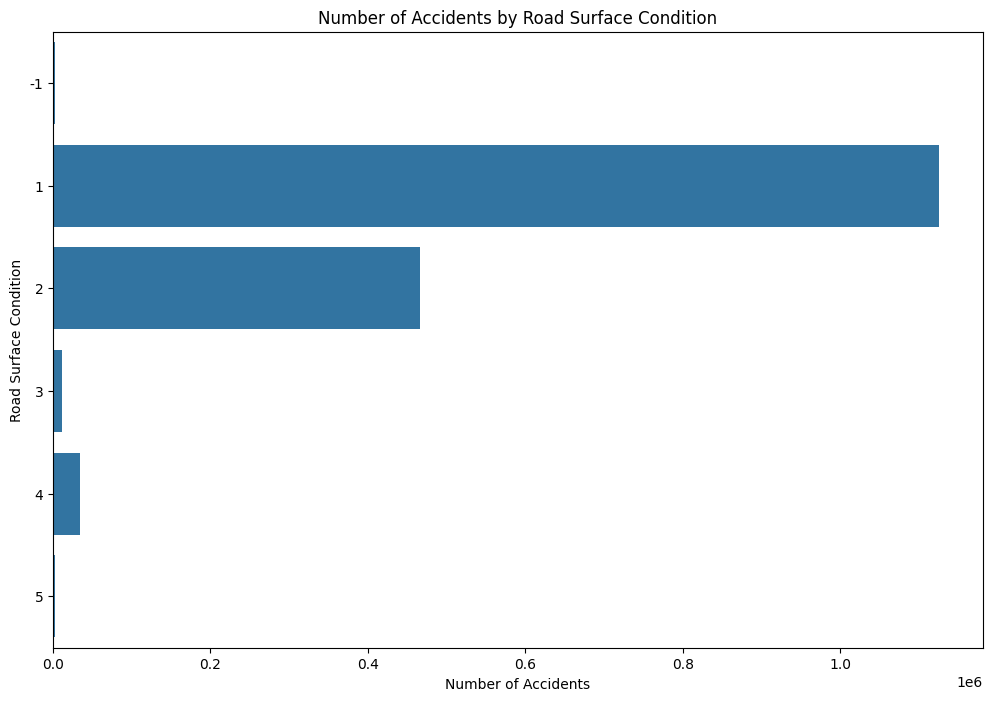

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(y='Road_Surface_Conditions', data=accidents)
plt.title('Number of Accidents by Road Surface Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Surface Condition')
plt.show()